In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math

In [0]:
train = pd.read_csv("diamonds.csv")
tr = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sampleSubmission.csv")

In [50]:
test.sort_values(by=['depth'])

,id,carat,cut,color,clarity,x,y,z,depth,table
10476,10476,1.00,Fair,G,VS2,6.31,6.24,4.12,44.0,53.0
1461,1461,0.30,Fair,E,VVS2,4.67,4.62,2.37,51.0,67.0
2912,2912,0.70,Fair,D,SI1,6.04,5.99,3.14,52.2,65.0
9262,9262,0.56,Fair,H,VS2,5.71,5.57,2.97,52.7,70.0
5882,5882,1.02,Fair,I,SI1,6.84,6.77,3.66,53.0,63.0
19719,19719,0.96,Fair,E,SI2,6.73,6.65,3.55,53.1,63.0
8539,8539,0.35,Fair,D,VVS2,4.87,4.80,2.57,53.2,62.0
1095,1095,1.08,Fair,E,SI1,6.99,6.81,3.71,53.8,63.0
13199,13199,0.35,Fair,F,VVS1,4.85,4.79,2.63,54.6,59.0
9256,9256,0.75,Fair,J,SI1,6.20,6.04,3.37,55.0,66.0


In [67]:
train.query('carat==0.96 and x==6.09 and y==5.9 and z==4.18')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2981,2982,0.96,Fair,G,SI1,69.7,59.0,3299,6.09,5.9,4.18


In [58]:
for i in range(1,1000):
  if train['carat'][i] == test['carat'][i] and train['x'][i] == test['x'][i] and train['y'][i] == test['y'][i] and train['z'][i] == test['z'][f]:
    train['price'][i] = test['price']

KeyError: ignored

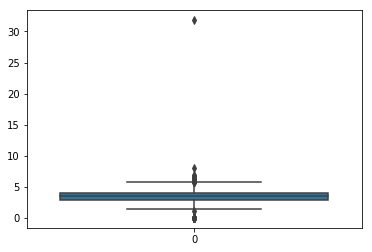

In [0]:
sb.boxplot(data=train['z'])